In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


In [24]:
home_folder = '/nethome/manra003/analysis/dispersion/outputs/env_out/'

output_folder = home_folder + '2017_dec/'
mes_date = 20171231

data_path = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/'
tfile = data_path + 'ROMEO.01_1d_thetao_{0}_grid_T.nc'.format(mes_date) 
temp_ds = xr.load_dataset(tfile)
sfile = data_path + 'ROMEO.01_1d_so_{0}_grid_T.nc'.format(mes_date)
sal_ds = xr.load_dataset(sfile)
temp_ds
# ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)


<xarray.Dataset>
Dimensions:              (y: 3896, x: 1903, nvertex: 4, deptht: 50, axis_nbounds: 2, time_counter: 1)
Coordinates:
  * deptht               (deptht) float32 0.3953 1.201 2.041 ... 504.1 542.0
  * time_counter         (time_counter) datetime64[ns] 2017-12-31T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    nav_lat              (y, x) float32 -78.39 -78.39 -78.39 ... 71.19 71.16
    nav_lon              (y, x) float32 -97.91 -97.84 -97.78 ... 66.27 66.28
    bounds_lon           (y, x, nvertex) float32 -97.94 -97.88 ... 66.32 66.31
    bounds_lat           (y, x, nvertex) float32 -78.4 -78.4 ... 71.15 71.18
    deptht_bounds        (deptht, axis_nbounds) float32 0.0 0.7943 ... 561.9
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] 2017-12-...
    thetao               (time_counter, deptht, y, x) float32 nan nan ... nan
Attributes: (12/14)
    name:                         ROMEO.01_1d_20171201_20171231_thetao_grid_T3D
    description:                  Created by xios
    title:                        Created by xios
    Conventions:                  CF-1.6
    timeStamp:                    2021-Jan-14 23:38:31 GMT
    uuid:                         5a735c11-6885-4258-b5de-bc2895e06f2d
    ...                           ...
    DOMAIN_type:                  box
    original_DOMAIN_size_global:  [5762 3963]
    comment:                      Global domain halo removed
    nemo_rebuild_version:         0.3.1-beta (31-03-2020)
    history:                      Wed Mar 24 20:35:01 2021: ncks -7 -O -C --n...
    NCO:                          netCDF Operators version 4.9.8 (Homepage = ...

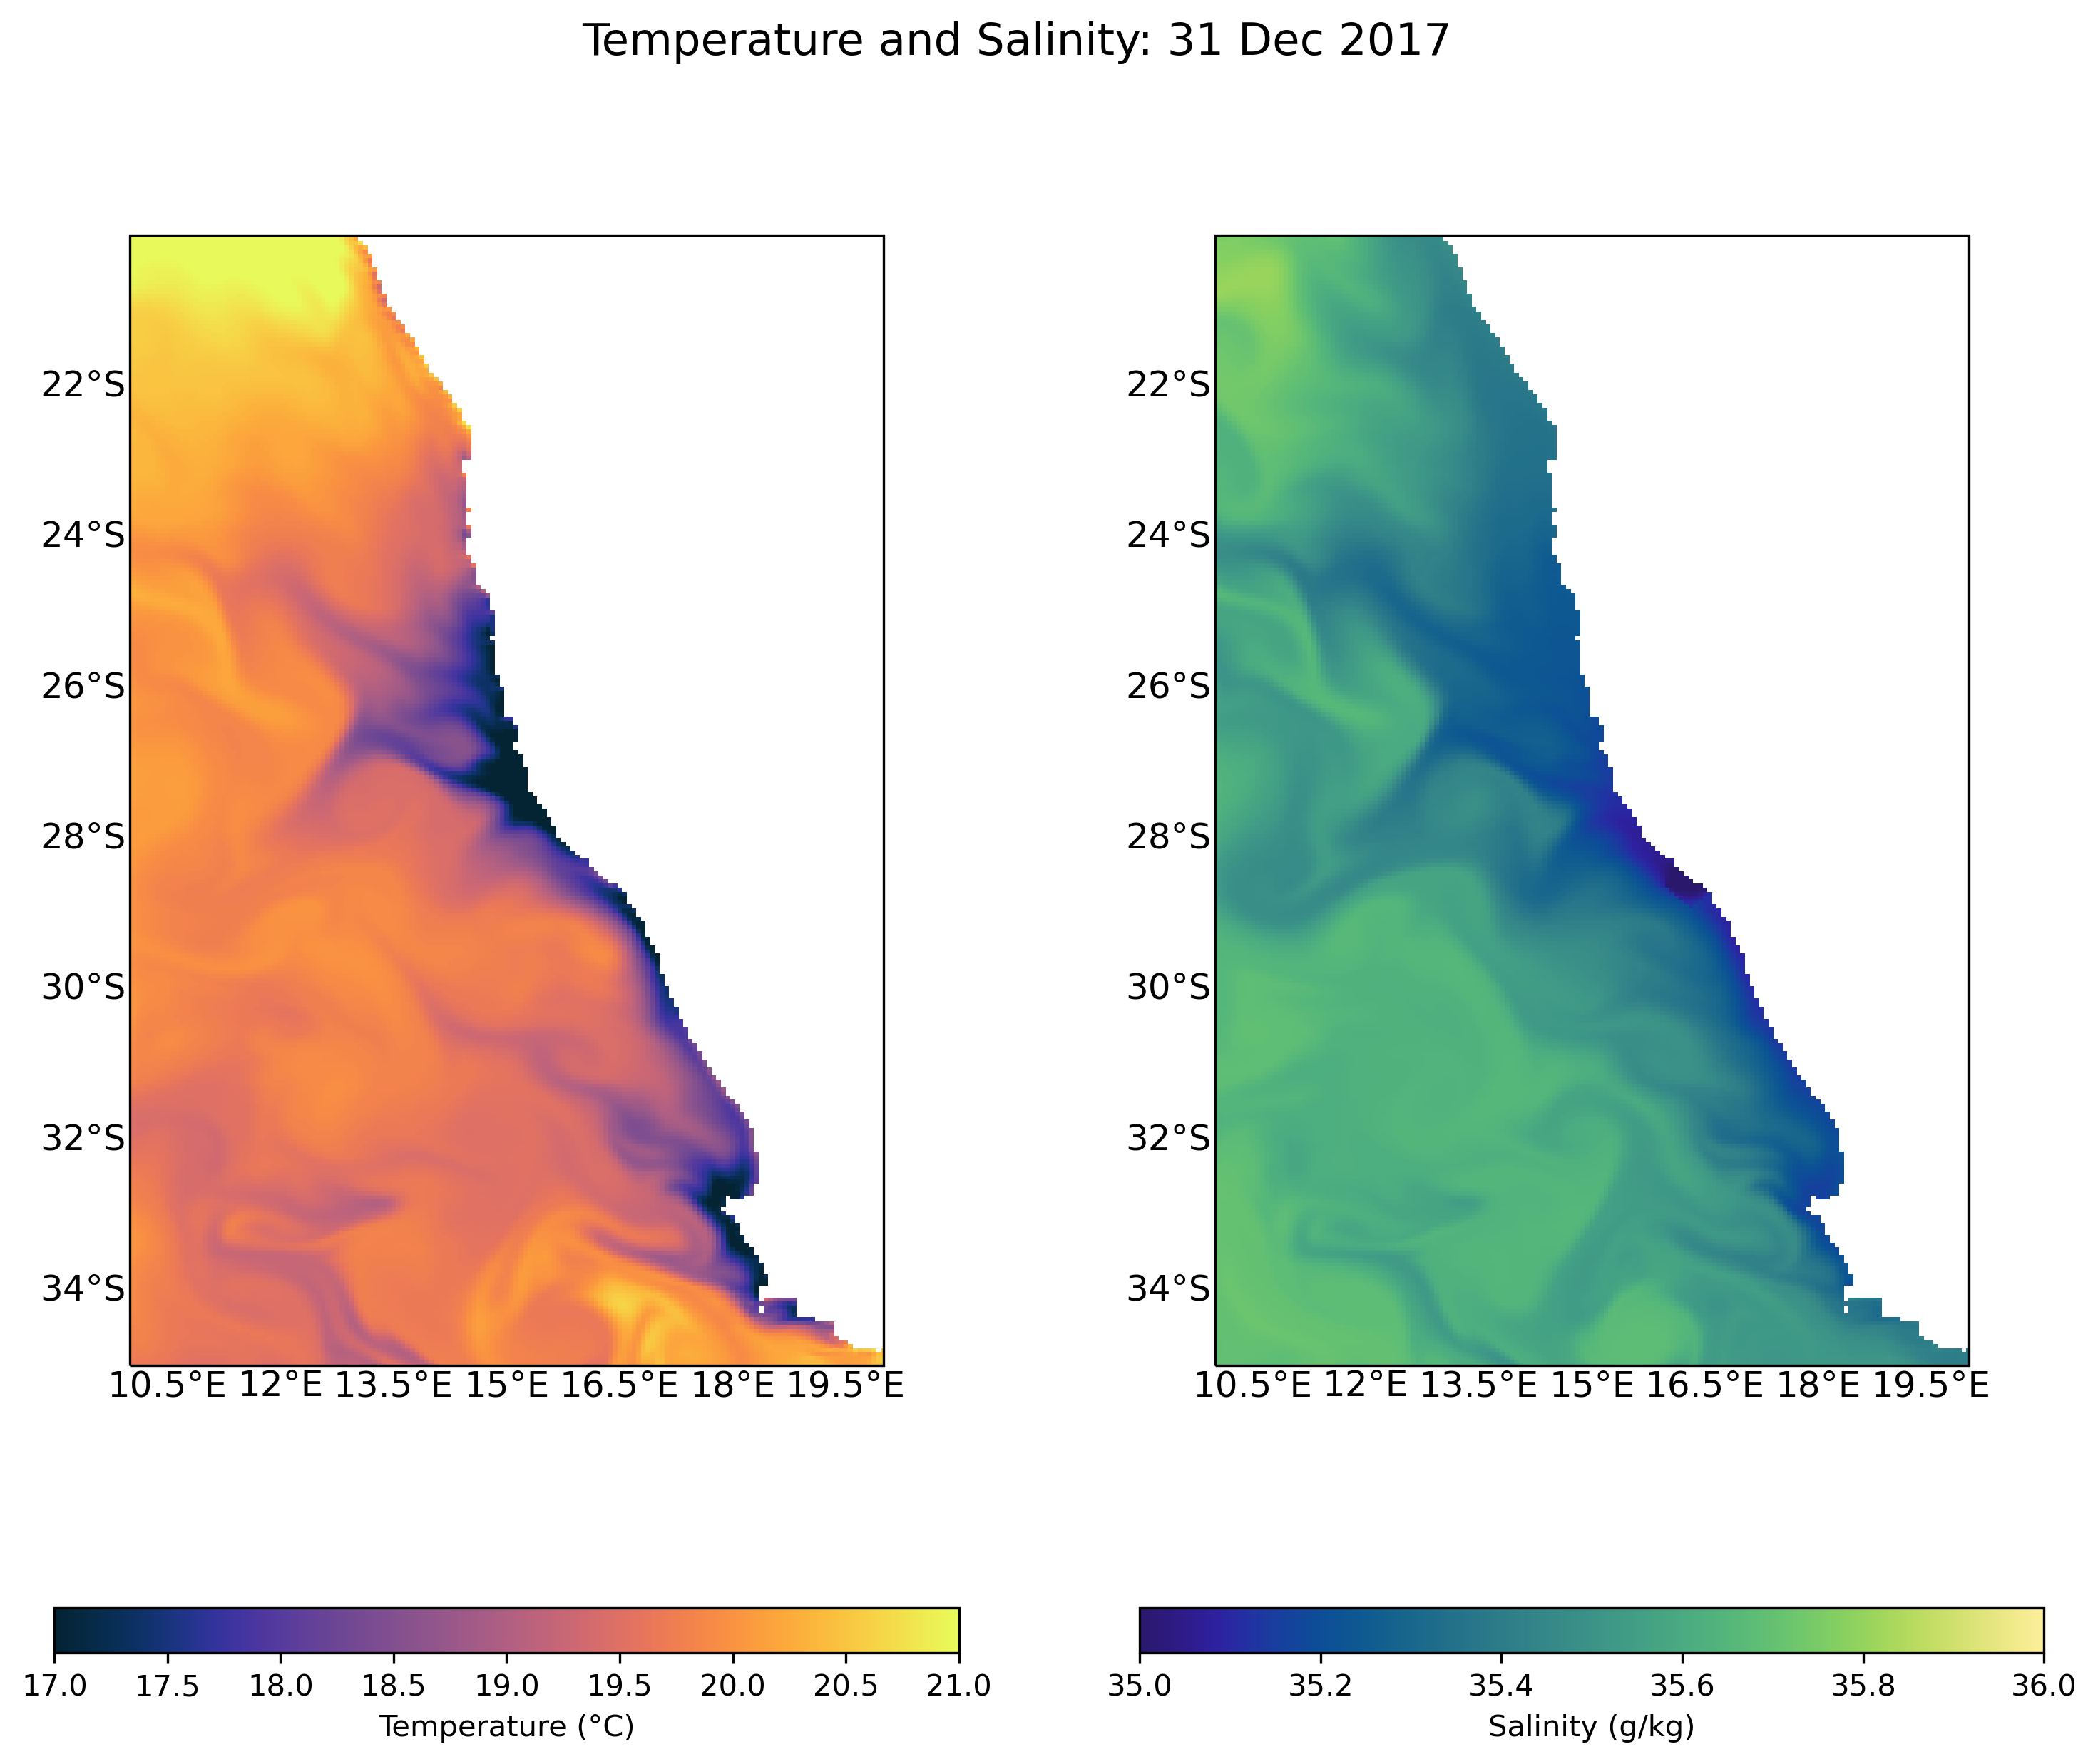

In [25]:
custom_size=12
fig = plt.figure(figsize=(12,10), dpi=300)
fig.suptitle("Temperature and Salinity: 31 Dec 2017", fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=2)

temp_min, temp_max = 17, 21
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(temp_ds.nav_lon[1249:1750, 1499:], temp_ds.nav_lat[1249:1750, 1499:], temp_ds.thetao[0, 0, 1250:1750, 1500:], cmap=cmocean.cm.thermal, vmin=temp_min, vmax=temp_max)
ax1.set_xlim(10,20)
ax1.set_ylim(-35,-20)

fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Temperature (°C)')

sal_min, sal_max = 35, 36
ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm2 = ax2.pcolormesh(sal_ds.nav_lon[1249:1750, 1499:], sal_ds.nav_lat[1249:1750, 1499:], sal_ds.so[0, 0, 1250:1750, 1500:], cmap=cmocean.cm.haline, vmin=sal_min, vmax=sal_max)

cbar2 = fig.colorbar(pcm2, ax=ax2, orientation='horizontal', label = 'Salinity (g/kg)')
ax2.set_xlim(10,20)
ax2.set_ylim(-35,-20)

plt.savefig(output_folder + '2017-12-31_TS.jpeg',bbox_inches='tight',
            pad_inches=0.2)


In [20]:
print(np.nanmin(temp_ds.thetao[0, 0, 1250:1750, 1500:]), np.nanmax(temp_ds.thetao[0, 0, 1250:1750, 1500:]))
print(np.nanmin(sal_ds.so[0, 0, 1250:1750, 1500:]), np.nanmax(sal_ds.so[0, 0, 1250:1750, 1500:]))


14.466474 27.92141
32.697315 36.957264
